# Import Libraries

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



# 📊 Supermarket Sales ML Project

## ✅ Tasks
1. Data Source
2. Data Description & Cleaning
3. Sales Forecasting (Regression)
4. Clustering
5. Basic Presentation


## 1️⃣ Data Source

- **Source:**  
  *Supermarket Sales Dataset* from [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

- **About:**  
  This dataset contains point-of-sale transactions from a supermarket with **3 branches** in a big city.  
  It includes:
  - Date and time of purchase  
  - Product line  
  - Quantity purchased  
  - Gross income, total cost  
  - Gross margin percentage (profitability)  
  - Payment method  
  - Customer gender  
  - Customer rating

- **How many records?**  
  The dataset contains about **1,000 rows**, covering sales over roughly **one month**.



# Import basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
print("Number of records:", len(df))
print("Columns:", df.columns)
df.head()

Number of records: 1000
Columns: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3



## 2️⃣ Data Cleaning & Description


In [4]:

# Check for null values
print(df.isnull().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()

# Describe data
df.describe()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000



**Feature Selection:**  
- For Sales Forecasting: Use `Unit price` and `Quantity` to predict `Total`  
- For Clustering: Use `Unit price`, `Quantity`, `Total`



## 3️⃣ Sales Forecasting
### Linear Regression & Random Forest


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Features and Target
X = df[['Unit price', 'Quantity']]
y = df['Total']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: 0.9042708171993606
Random Forest R2: 0.9996174117303394



## 4️⃣ Clustering
### K-Means & DBSCAN


In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Features for Clustering
X_cluster = df[['Unit price', 'Quantity', 'Total']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

df[['Unit price', 'Quantity', 'Total', 'Cluster_KMeans', 'Cluster_DBSCAN']].head()


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Unit price,Quantity,Total,Cluster_KMeans,Cluster_DBSCAN
0,74.69,7,548.9715,1,0
1,15.28,5,80.2200,2,0
2,46.33,7,340.5255,2,0
3,58.22,8,489.0480,1,0
4,86.31,7,634.3785,1,0



## 5️⃣ Presentation (Plots)


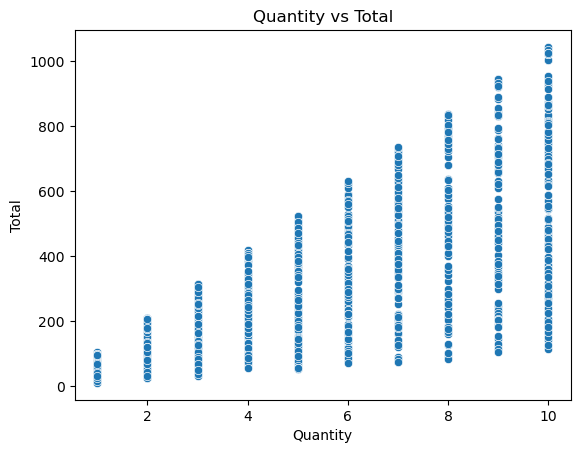

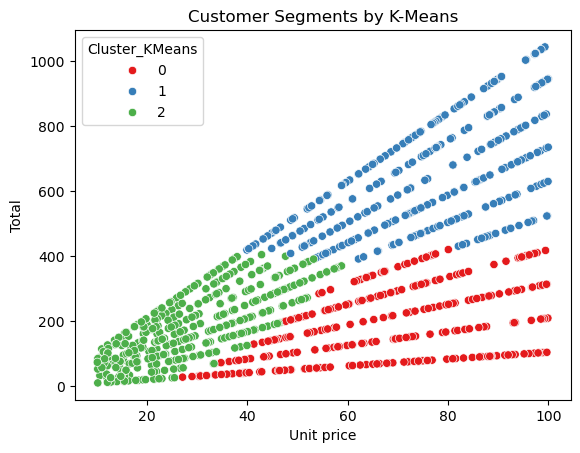

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter: Quantity vs Total
sns.scatterplot(x='Quantity', y='Total', data=df)
plt.title("Quantity vs Total")
plt.show()

# KMeans Clusters
sns.scatterplot(x='Unit price', y='Total', hue='Cluster_KMeans', data=df, palette='Set1')
plt.title("Customer Segments by K-Means")
plt.show()
